# 什么是集成学习

In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [5]:
from sklearn import datasets
X, y = datasets.make_moons(n_samples=500, noise=0.25)

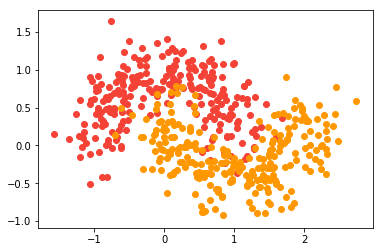

In [6]:
plt.scatter(X[y==0, 0], X[y==0, 1], color="#f44336")
plt.scatter(X[y==1, 0], X[y==1, 1], color="#ff9800")
plt.show()

In [7]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y)

In [8]:
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier

In [9]:
log_clf = LogisticRegression()
svm_clf = SVC()
dt_clf = DecisionTreeClassifier()

In [10]:
log_clf.fit(X_train, y_train)
log_clf.score(X_test, y_test)

0.84799999999999998

In [12]:
svm_clf.fit(X_train, y_train)
svm_clf.score(X_test, y_test)

0.92000000000000004

In [13]:
dt_clf.fit(X_train, y_train)
dt_clf.score(X_test, y_test)

0.872

In [16]:
y_predict1 = log_clf.predict(X_test)
y_predict2 = svm_clf.predict(X_test)
y_predict3 = dt_clf.predict(X_test)
y_predict = np.array((y_predict1 + y_predict2 + y_predict3) >= 2, dtype="int")

from sklearn.metrics import accuracy_score
accuracy_score(y_test, y_predict)

0.91200000000000003

#### 使用Voting Classifier

In [17]:
from sklearn.ensemble import VotingClassifier

vt_clf = VotingClassifier(estimators=[
    ("log_clf", LogisticRegression()),
    ("svm_clf", SVC()),
    ("dt_clf", DecisionTreeClassifier())
], voting="hard")

In [19]:
vt_clf.fit(X_train, y_train)
vt_clf.score(X_test, y_test)

0.91200000000000003